In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Assignments/Simple Linear Regression'

Mounted at /content/drive
 delivery_time.csv	  Salary_Data.csv
 Problem_statements.txt  'Simple Linear Regression.ipynb'


In [ ]:
import os
os.getcwd()
os.chdir('drive/My Drive/Assignments/Simple Linear Regression')
os.getcwd()
os.listdir()

['Salary_Data.csv',
 'delivery_time.csv',
 'Problem_statements.txt',
 'Simple Linear Regression.ipynb']

Q: Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


## Step 1

Importing Data

In [ ]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Step 2

# Performing EDA on coloumns

Renaming Columns

In [ ]:
df = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Checking Data type

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Checking for Null values

In [ ]:
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

Checking for duplicated values

In [ ]:
df.duplicated()
df[df.duplicated()]

,Delivery_Time,Sorting_Time


# Step 3

Plotting data to check for outliers

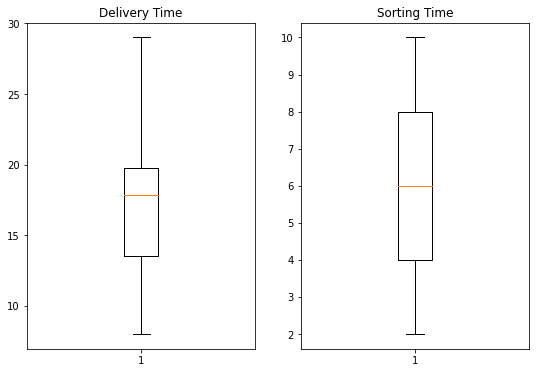

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

It can be concluded that there are no outliers in the data

# Step 4

Check for correlation between the variables

In [ ]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Visualization of Correlation beteen x and y

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

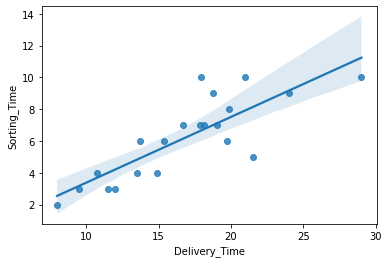

In [52]:
sns.regplot(x=df['Delivery_Time'],y=df['Sorting_Time']) 

It can be concluded that there is a strong correlation between the two variables. The correlation coefficient is 0.895which shows the strong relation.

# Step 5

# Feature Engineering
Apply different transformation of data to estimate normal distribution and to remove any skewness to the delivary time column


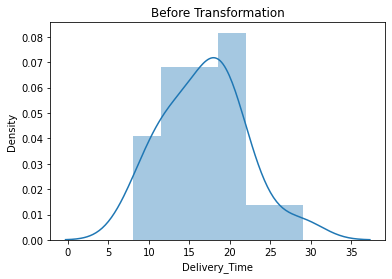

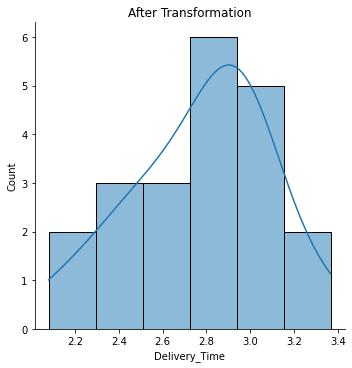

In [ ]:
sns.distplot(df['Delivery_Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery_Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

It can be concluded that the data is normally distributed without any outliers. There is also no significant skewness.

# Plotting the QQ plot of Delivary time coloumn to check for normal distribution of data before and after transformation

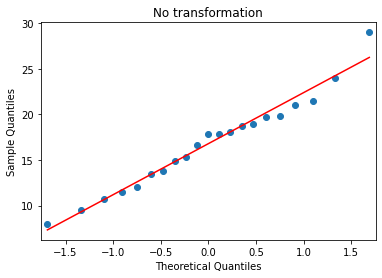

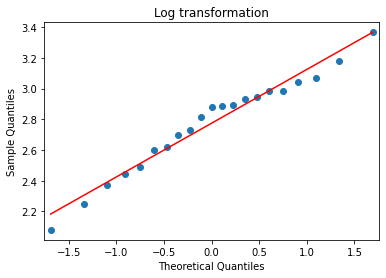

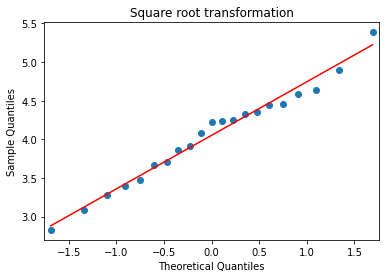

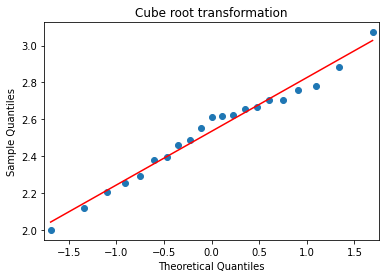

In [ ]:
smf.qqplot(df['Delivery_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Similar plots for Sorting time coloumn

Apply different transformation of data to estimate normal distribution and to remove any skewness to the Sorting time column

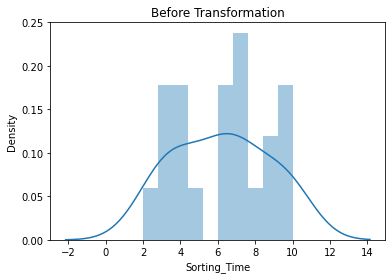

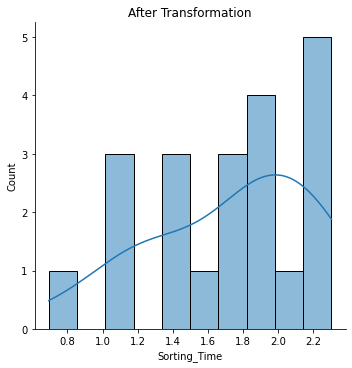

In [ ]:
sns.distplot(df['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

It can be seen that the data is normally distributed around the mean 6 before transformation. So no transformation is required to be applied to the data before model fitting.

# Plotting the QQ plot of Sorting time coloumn to check for normal distribution of data before and after transformation

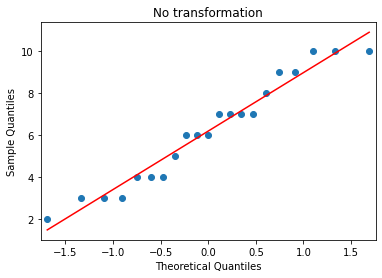

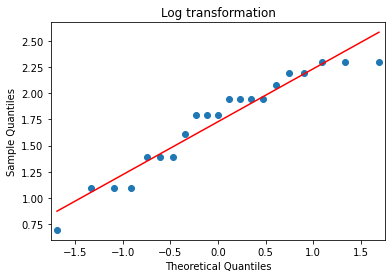

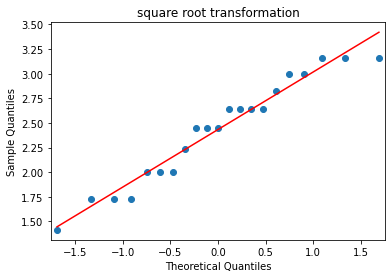

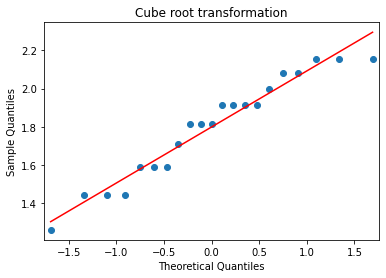

In [ ]:
smf.qqplot(df['Sorting_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting_Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

It can be concluded that for both the Delivary time and Sorting time the data is distributed evenly and closely around the reference line is a straight line that shows how the data points are distributed as they follow a normal distribution. 

# Step 6

# Fitting a Linear Regression Model

Method 1

Using Ordinary least squares (OLS) regression

In [ ]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        11:59:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It can be concluded that

*   The R-squared and Adjusted R-squared scores are below 0.85.
*   (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
*   Lets Try some data transformation to check whether these scores can get any higher than this.




# Square Root transformation on data

In [ ]:
square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 27 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                            12:06:53   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be concluded that


*  After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.




# Cube Root transformation on Data

In [ ]:
cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Mon, 27 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                            12:10:27   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It can be concluded that 

*   After Cube root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.





# Log transformation on Data

In [ ]:
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 27 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                           12:12:05   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It can be concluded that

*   After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model

* Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
  
*   Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.





# Step 7
# Model Testing
As Y = Beta0 + Beta1*(X)
# Finding Coefficient Parameters (Beta0 and Beta1 values)

In [ ]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
log_model.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [ ]:
log_value = 0.597522
anti_log = np.exp(log_value)

print(anti_log)

1.817609179730743


# Step 8

Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

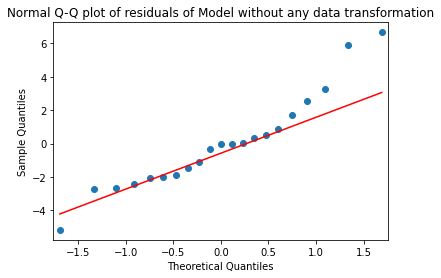

In [ ]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

With log transformed data

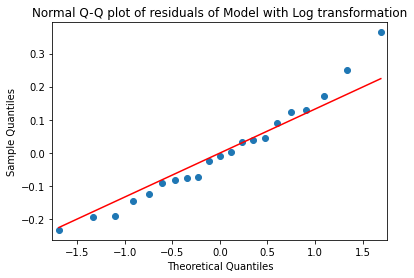

In [ ]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

* Both The Model have slightly different plots
* The first model is right skewed and doesn't follow normal distribution
* The second model after log-transformation follows normal distributon with less skewness than first model

# Residual Plot to check Homoscedasticity or Hetroscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

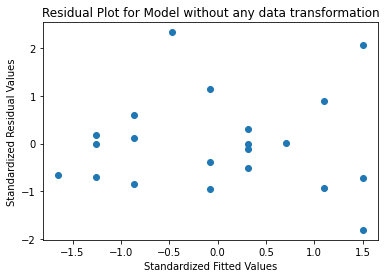

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

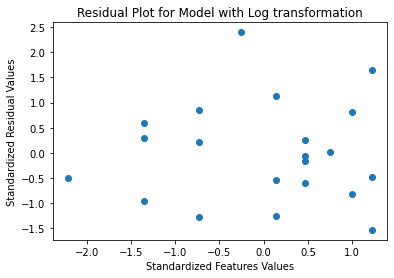

In [ ]:
plt.scatter(get_standardized_values(log_model.fittedvalues), get_standardized_values(log_model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# It can be concluded that 

* Both The Model have Homoscedasciticity.
* The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
* Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed


# Step 9

# Model Validation
Comparing different models with respect to their Root Mean Squared Errors
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — i.e. the average distance between the model’s predicted target value and the actual target value.

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
square_root_pred_y =np.square(square_root_model.predict(df['Sorting_Time']))
cube_root_pred_y =pow(cube_root_model.predict(df['Sorting_Time']),3)
log_model_pred_y =np.exp(log_model.predict(df['Sorting_Time']))

In [56]:
square_root_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)


model= 2.934903768890139 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893576 
log_model= 2.745828897614548


In [ ]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

As log_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use log_model to predict our values

# Step 10
Predicting values from Model with Log Transformation on the Data

In [ ]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df.Sorting_Time
predicted['Delivery_Time'] = df.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


Predicitng from Original Model without any data transformation

In [ ]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df.Sorting_Time
predicted1['Delivery_Time'] = df.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
